<a href="https://colab.research.google.com/github/adit333/handson_machine_learning/blob/main/ensemble_learning_and_random_forests_ch7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Ensemble Learning & Random Forests***

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

# **Voting Classifiers**

Scikit-Learn provides a VotingClassifier class that’s quite easy to use: just give it a list of name/predictor pairs, and use it like a normal classifier, that’s it! Let’s try it on the moons dataset: we will load and split the moons dataset into a training set and a test set, then we’ll create and train a voting classifier composed of three diverse classifiers:

In [ ]:
from sklearn.datasets import make_moons
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

voting_clf = VotingClassifier(
    estimators=[
        ('lr', LogisticRegression(random_state=42)),
        ('rf', RandomForestClassifier(random_state=42)),
        ('svc', SVC(random_state=42))
    ]
)
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(random_state=42))])

When you fit a VotingClassifier, it clones every estimator and fits the clones. The original estimators are available via the estimators attribute, while the fitted clones are available via the estimators_ attribute. If you prefer a dict rather than a list, you can use named_estimators or named_estimators_ instead. For example, let’s look at each fitted classifier’s accuracy on the test set:

In [ ]:
for name, clf in voting_clf.named_estimators_.items():
    print(name, "=", clf.score(X_test, y_test))

lr = 0.864
rf = 0.896
svc = 0.896


In [ ]:
voting_clf.score(X_test, y_test)

0.912

Now let's use soft voting:

In [ ]:
voting_clf.voting = "soft"
voting_clf.named_estimators["svc"].probability = True
voting_clf.fit(X_train, y_train)
voting_clf.score(X_test, y_test)

0.92

# **Bagging and Pasting**

Scikit-Learn offers a simple API for both bagging and pasting with the BaggingClas
sifier class (or BaggingRegressor for regression). The following code trains an
ensemble of 500 Decision Tree classifiers: each is trained on 100 training instances
randomly sampled from the training set with replacement (this is an example of bagging,
but if you want to use pasting instead, just set bootstrap=False). The n_jobs
parameter tells Scikit-Learn the number of CPU cores to use for training and predictions
(–1 tells Scikit-Learn to use all available cores):

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500,
                            max_samples=100, random_state=42, bootstrap=True)
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=100,
                  n_estimators=500, random_state=42)

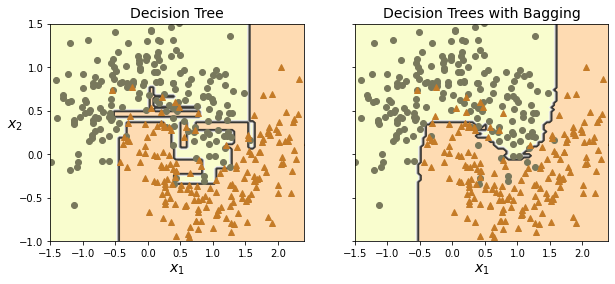

In [ ]:
def plot_decision_boundary(clf, X, y, alpha=1.0):
    axes=[-1.5, 2.4, -1, 1.5]
    x1, x2 = np.meshgrid(np.linspace(axes[0], axes[1], 100),
                         np.linspace(axes[2], axes[3], 100))
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    
    plt.contourf(x1, x2, y_pred, alpha=0.3 * alpha, cmap='Wistia')
    plt.contour(x1, x2, y_pred, cmap="Greys", alpha=0.8 * alpha)
    colors = ["#78785c", "#c47b27"]
    markers = ("o", "^")
    for idx in (0, 1):
        plt.plot(X[:, 0][y == idx], X[:, 1][y == idx],
                 color=colors[idx], marker=markers[idx], linestyle="none")
    plt.axis(axes)
    plt.xlabel(r"$x_1$")
    plt.ylabel(r"$x_2$", rotation=0)

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf, X_train, y_train)
plt.title("Decision Tree")
plt.sca(axes[1])
plot_decision_boundary(bag_clf, X_train, y_train)
plt.title("Decision Trees with Bagging")
plt.ylabel("")
plt.show()

## **Exercises**

## 8) Voting Classifier

Exercise: _Load the MNIST data and split it into a training set, a validation set, and a test set (e.g., use 50,000 instances for training, 10,000 for validation, and 10,000 for testing)._

The MNIST dataset was loaded earlier. The dataset is already split into a training set (the first 60,000 instances) and a test set (the last 10,000 instances), and the training set is already shuffled. So all we need to do is to take the first 50,000 instances for the new training set, the next 10,000 for the validation set, and the last 10,000 for the test set:

In [1]:
from sklearn.datasets import fetch_openml

X_mnist, y_mnist = fetch_openml('mnist_784', return_X_y=True, as_frame=False)

X_train, y_train = X_mnist[:50_000], y_mnist[:50_000]
X_valid, y_valid = X_mnist[50_000:60_000], y_mnist[50_000:60_000]
X_test, y_test = X_mnist[60_000:], y_mnist[60_000:]

Exercise: _Then train various classifiers, such as a Random Forest classifier, an Extra-Trees classifier, and an SVM._

In [3]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier

In [6]:
random_forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
extra_trees_clf = ExtraTreesClassifier(n_estimators=100, random_state=42)
svm_clf = LinearSVC(max_iter=100, tol=20, random_state=42)
mlp_clf = MLPClassifier(random_state=42)

In [7]:
estimators = [random_forest_clf, extra_trees_clf, svm_clf, mlp_clf]
for estimator in estimators:
    print("Training the", estimator)
    estimator.fit(X_train, y_train)

Training the RandomForestClassifier(random_state=42)
Training the ExtraTreesClassifier(random_state=42)
Training the LinearSVC(max_iter=100, random_state=42, tol=20)
Training the MLPClassifier(random_state=42)


In [8]:
for estimator in estimators:
    print(estimator, estimator.score(X_valid, y_valid))

RandomForestClassifier(random_state=42) 0.9736
ExtraTreesClassifier(random_state=42) 0.9743
LinearSVC(max_iter=100, random_state=42, tol=20) 0.8662
MLPClassifier(random_state=42) 0.9641


The linear SVM is far outperformed by the other classifiers. However, let's keep it for now since it may improve the voting classifier's performance.

Exercise: _Next, try to combine \[the classifiers\] into an ensemble that outperforms them all on the validation set, using a soft or hard voting classifier._

In [9]:
from sklearn.ensemble import VotingClassifier

In [10]:
named_estimators = [
    ("random_forest_clf", random_forest_clf),
    ("extra_trees_clf", extra_trees_clf),
    ("svm_clf", svm_clf),
    ("mlp_clf", mlp_clf),
]

In [11]:
voting_clf = VotingClassifier(named_estimators)

In [12]:
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('random_forest_clf',
                              RandomForestClassifier(random_state=42)),
                             ('extra_trees_clf',
                              ExtraTreesClassifier(random_state=42)),
                             ('svm_clf',
                              LinearSVC(max_iter=100, random_state=42, tol=20)),
                             ('mlp_clf', MLPClassifier(random_state=42))])

In [13]:
voting_clf.score(X_valid, y_valid)

0.9759

The `VotingClassifier` made a clone of each classifier, and it trained the clones using class indices as the labels, not the original class names. Therefore, to evaluate these clones we need to provide class indices as well. To convert the classes to class indices, we can use a `LabelEncoder`:

In [14]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y_valid_encoded = encoder.fit_transform(y_valid)

In [17]:
y_valid

array(['3', '8', '6', ..., '5', '6', '8'], dtype=object)

In [16]:
y_valid_encoded

array([3, 8, 6, ..., 5, 6, 8])

However, in the case of MNIST, it's simpler to just convert the class names to integers, since the digits match the class ids:

In [19]:
import numpy as np

y_valid_encoded = y_valid.astype(np.int64)

Now let's evaluate the classifier clones:

In [21]:
for estimator in voting_clf.estimators_:
    print(estimator, estimator.score(X_valid, y_valid_encoded))

RandomForestClassifier(random_state=42) 0.9736
ExtraTreesClassifier(random_state=42) 0.9743
LinearSVC(max_iter=100, random_state=42, tol=20) 0.8662
MLPClassifier(random_state=42) 0.9641


Let's remove the SVM to see if performance improves. It is possible to remove an estimator by setting it to `"drop"` using `set_params()` like this:

In [22]:
voting_clf.set_params(svm_clf="drop")

VotingClassifier(estimators=[('random_forest_clf',
                              RandomForestClassifier(random_state=42)),
                             ('extra_trees_clf',
                              ExtraTreesClassifier(random_state=42)),
                             ('svm_clf', 'drop'),
                             ('mlp_clf', MLPClassifier(random_state=42))])

This updated the list of estimators:

In [23]:
voting_clf.estimators

[('random_forest_clf', RandomForestClassifier(random_state=42)),
 ('extra_trees_clf', ExtraTreesClassifier(random_state=42)),
 ('svm_clf', 'drop'),
 ('mlp_clf', MLPClassifier(random_state=42))]

However, it did not update the list of _trained_ estimators:

In [25]:
voting_clf.estimators_

[RandomForestClassifier(random_state=42),
 ExtraTreesClassifier(random_state=42),
 LinearSVC(max_iter=100, random_state=42, tol=20),
 MLPClassifier(random_state=42)]

In [24]:
voting_clf.named_estimators_

{'extra_trees_clf': ExtraTreesClassifier(random_state=42),
 'mlp_clf': MLPClassifier(random_state=42),
 'random_forest_clf': RandomForestClassifier(random_state=42),
 'svm_clf': LinearSVC(max_iter=100, random_state=42, tol=20)}

So we can either fit the `VotingClassifier` again, or just remove the SVM from the list of trained estimators, both in `estimators_` and `named_estimators_`:

In [26]:
svm_clf_trained = voting_clf.named_estimators_.pop("svm_clf")
voting_clf.estimators_.remove(svm_clf_trained)

Now let's evaluate the `VotingClassifier` again:

In [28]:
voting_clf.score(X_valid, y_valid)

0.9766

A bit better! The SVM was hurting performance. Now let's try using a soft voting classifier. We do not actually need to retrain the classifier, we can just set `voting` to `"soft"`:

In [29]:
voting_clf.voting = "soft"

In [30]:
voting_clf.score(X_valid, y_valid)

0.9709

Nope, hard voting wins in this case.

_Once you have found \[an ensemble that performs better than the individual predictors\], try it on the test set. How much better does it perform compared to the individual classifiers?_

In [31]:
voting_clf.voting = "hard"
voting_clf.score(X_test, y_test)

0.9733

In [33]:
for estimator in voting_clf.estimators_:
    print(estimator, estimator.score(X_test, y_test.astype(np.int8)))

RandomForestClassifier(random_state=42) 0.968
ExtraTreesClassifier(random_state=42) 0.9703
MLPClassifier(random_state=42) 0.9634


The voting classifier reduced the error rate of the best model from about 3% to 2.7%, which means 10% less errors.

## 9) Stacking Ensemble

Exercise: _Run the individual classifiers from the previous exercise to make predictions on the validation set, and create a new training set with the resulting predictions: each training instance is a vector containing the set of predictions from all your classifiers for an image, and the target is the image's class. Train a classifier on this new training set._

In [35]:
X_valid_predictions = np.empty((len(X_valid), len(estimators)), dtype=object)

In [37]:
for index, estimator in enumerate(estimators):
    X_valid_predictions[:, index] = estimator.predict(X_valid)

In [38]:
X_valid_predictions

array([['3', '3', '3', '3'],
       ['8', '8', '8', '8'],
       ['6', '6', '6', '6'],
       ...,
       ['5', '5', '5', '5'],
       ['6', '6', '6', '6'],
       ['8', '8', '8', '8']], dtype=object)

In [39]:
rnd_forest_blender = RandomForestClassifier(n_estimators=200, oob_score=True,
                                               random_state=42)
rnd_forest_blender.fit(X_valid_predictions, y_valid)

RandomForestClassifier(n_estimators=200, oob_score=True, random_state=42)

In [40]:
rnd_forest_blender.oob_score_

0.9749

Exercise: _Congratulations, you have just trained a blender, and together with the classifiers they form a stacking ensemble! Now let's evaluate the ensemble on the test set. For each image in the test set, make predictions with all your classifiers, then feed the predictions to the blender to get the ensemble's predictions. How does it compare to the voting classifier you trained earlier?_

In [42]:
X_test_predictions = np.empty((len(X_test), len(estimators)), dtype=object)

for index, estimator in enumerate(estimators):
    X_test_predictions[:, index] = estimator.predict(X_test)

In [44]:
rnd_forest_blender.score(X_test_predictions, y_test)

0.969

This stacking ensemble does not perform as well as the voting classifier we trained earlier (which achieved 0.9733), and it's even very slightly worse than the best individual classifier (Extra-trees has 0.9703).

Exercise: _Now try again using a `StackingClassifier` instead: do you get better performance? If so, why?_

Since `StackingClassifier` uses K-Fold cross-validation, we don't need a separate validation set, so let's join the training set and the validation set into a bigger training set:

In [45]:
X_train_full, y_train_full = X_mnist[:60_000], y_mnist[:60_000]

Now let's create and train the stacking classifier on the full training set:

**Warning**: the following cell will take quite a while to run (15-30 minutes depending on your hardware), as it uses K-Fold validation with 5 folds by default. It will train the 4 classifiers (the estimators) 5 times each on 80% of the full training set to make the predictions, plus one last time each on the full training set (so 24 models), and lastly it will train the final model on the predictions. That's a total of 25 models to train!


In [46]:
from sklearn.ensemble import StackingClassifier

stack_clf = StackingClassifier(named_estimators,
                               final_estimator=rnd_forest_blender)
stack_clf.fit(X_train_full, y_train_full)

StackingClassifier(estimators=[('random_forest_clf',
                                RandomForestClassifier(random_state=42)),
                               ('extra_trees_clf',
                                ExtraTreesClassifier(random_state=42)),
                               ('svm_clf',
                                LinearSVC(max_iter=100, random_state=42,
                                          tol=20)),
                               ('mlp_clf', MLPClassifier(random_state=42))],
                   final_estimator=RandomForestClassifier(n_estimators=200,
                                                          oob_score=True,
                                                          random_state=42))

In [47]:
stack_clf.score(X_test, y_test)

0.9797

The `StackingClassifier` significantly outperforms the custom stacking implementation we tried earlier! This is for mainly two reasons:

* Since we could reclaim the validation set, the `StackingClassifier` was trained on a larger dataset.
* It used `predict_proba()` if available, or else `decision_function()` if available, or else `predict()`. This gave the blender much more nuanced inputs to work with.

That's all for today 😀